In [1]:
from config import *
from datasets import FashionDataset, FashionPipeline
from utils import *
from model import *
import torch
import matplotlib.pyplot as plts
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,ConcatDataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

config:  /mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/FashionNeRF


ERROR:root:/mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/Results does not exist.
ERROR:root:/mnt/d/Playground/Research/Synthesising Virtual Fashion Try-On with Neural Radiance Fields/Dataset does not exist.


device(type='cuda')

In [2]:
# argparse 
model_3d = "dennis3"
transform = transforms.ToTensor()
train_dataset = FashionDataset(model=model_3d,data="test")
mask_dataset = FashionDataset(model=model_3d,data="test",type="depth")


In [3]:
train_dataset.__len__(),mask_dataset.__len__()

(40, 40)

In [6]:
i0,r0 = train_dataset.__getitem__(0)

In [7]:
i1,r1 = mask_dataset.__getitem__(0)

In [13]:
i0.shape,i1.shape

(torch.Size([100, 100, 3]), torch.Size([100, 100, 1]))

In [9]:
import matplotlib.pyplot as plt

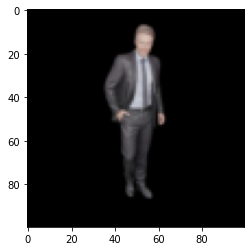

In [11]:
plt.imshow(i0,cmap='gray')

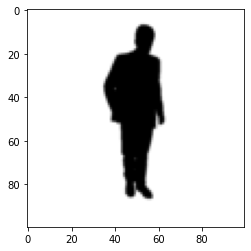

In [12]:
plt.imshow(i1,cmap='gray')

In [ ]:
train_pipeline = FashionPipeline(train_dataset,nC=NUM_SAMPLES,near=near,far=far,rand=True)
train_pipeline_loader = DataLoader(train_pipeline,batch_size=BATCH_SIZE,shuffle=True)

In [3]:
encode_dims,H,W,nC,BATCH_SIZE,num_pos

(16, 100, 100, 12, 5, 120000)

In [4]:
torch.cuda.empty_cache()

In [5]:
image,rays_flat,t_vals = iter(train_pipeline_loader).next()
image.shape,rays_flat.shape,t_vals.shape

(torch.Size([5, 100, 100, 3]),
 torch.Size([5, 120000, 99]),
 torch.Size([5, 100, 100, 12]))

In [50]:
img = image[0][:,:,1].detach().numpy()

In [51]:
z = img.copy()

In [52]:
mask_ind = (img != 0)
z[mask_ind] = 1

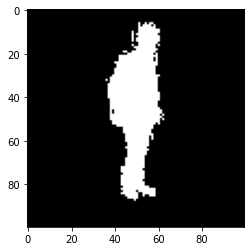

In [53]:
plt.imshow(z,cmap='gray')